Importação de pacotes

In [1]:
import tweepy
import pandas as pd 
import numpy as np 
from textblob import TextBlob as tb
import time
import re

import matplotlib.pyplot as plt

from geopy.geocoders import Nominatim
import folium
from folium import plugins
from wordcloud import WordCloud, STOPWORDS

Definição das credenciais de acesso (autenticação) na API do Twitter

In [2]:
# Credenciais para utilização da API do Twitter

consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

Autenticação na API do Twitter

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True, retry_count = 5)

Coleta de dados (busca por palavra chave)

In [4]:
# Definir listas de armazenamento
tweets = []
info = []

keyword = ('palavrasChave')

Exemplo básico para busca por palavra chave e recuperar os tweets em português

In [5]:
from googletrans import Translator
from unidecode import unidecode
import json

In [6]:
polaritiesPT = []

for tweetpt in tweepy.Cursor(api.search, q = keyword, tweet_mode = 'extended', rpp = 5, result_type = "popular", 
                             lang = "pt", include_entities = True).items(5):
    #Texto do tweet
    textPT = unidecode(tweetpt.full_text)
    print('*** Tweet em português: '+textPT)
    
    #Traduzindo para o Inglês
    textEN = Translator().translate(textPT)
    print('*** Tweet traduzido:')
    print(textEN.text)
    
    #Calculando a polaridade do texto traduzido
    polarityPT = tb(textEN.text).sentiment.polarity
    
    polaritiesPT.append(polarityPT)
    print('\n')    

*** Tweet em português: Um conhecido esta sendo pressionado pelo RH da empresa a tomar o tal do kit covid-19 antes de voltarem do home office.

Assim como todos funcionarios da empresa.

Nao da pra piorar.
*** Tweet traduzido:
A known is being pressed by the company HR taking such kit covid-19 before returning home from the office.

As well as all employees of the company.

Not for the worse.


*** Tweet em português: Com home office, BB vai devolver 19 de 35 edificios de escritorios https://t.co/e81xHfaIu1
*** Tweet traduzido:
As home office, BB will return 19 of 35 office buildings https://t.co/e81xHfaIu1


*** Tweet em português: Com home office, Banco do Brasil vai devolver 19 de 35 edificios de escritorios no pais https://t.co/Xc6T6Sw3yJ
*** Tweet traduzido:
As home office, Bank of Brazil will return 19 of 35 office buildings in the country https://t.co/Xc6T6Sw3yJ


*** Tweet em português: Mulher e demitida e diz que motivo foi o barulho dos filhos pequenos nas chamadas de trabalh

In [7]:
print(polaritiesPT)

[-0.2, 0.0, 0.0, -0.25, 0.275]


Buscar por palavra chave e recuperar os tweets em inglês

In [8]:
for tweet in tweepy.Cursor(api.search, q = keyword, tweet_mode = 'extended',
                           rpp = 1000, result_type = "mixed", lang = 'en',
                           include_entities = True).items(1000):
    
    if 'retweeted_status' in dir(tweet):
        aux = tweet.retweeted_status.full_text
    else:
        aux = tweet.full_text
    
    newtweet = aux.replace("\n", " ")
    
    tweets.append(newtweet)
    info.append(tweet)
    
    file = open(r"diretorio/nomeDoArquivo.txt", "a", -1, "utf-8")
    file.write(newtweet+'\n')
    file.close()

Para verificar a quantidade de tweets coletado use a função "len()"

In [9]:
print("Total de tweets coletados: %s."%(len(info)))

Total de tweets coletados: 1000.


Verificar a estrutura do tweet

In [10]:
status = info[0]

# Converter para string
json_str = json.dumps(status._json)

# Deserialise string para um obejto python
parsed = json.loads(json_str)

In [11]:
parsed

{'created_at': 'Wed Jul 08 14:40:58 +0000 2020',
 'id': 1280874522359533569,
 'id_str': '1280874522359533569',
 'full_text': 'Amazing, amazing figure. \n\nThe bill for PPE this year is now estimated at £15bn...\n\n.... more than the combined cost of all three great offices of state - the  Home Office, the Foreign Office and the Treasury',
 'truncated': False,
 'display_text_range': [0, 208],
 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
 'metadata': {'result_type': 'popular', 'iso_language_code': 'en'},
 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 305073570,
  'id_str': '305073570',
  'name': 'Chris Giles',
  'screen_name': 'ChrisGiles_',
  'location': '',
  'description': 'Economics Editor, FT',
  'url': 'https://t.co/PNl

Criar dataframe para transferencia de dados

In [12]:
tweets_df = pd.DataFrame(tweets, columns={'Tweets'})

tweets_df['len'] = np.array([len(tweet) for tweet in tweets])
tweets_df['ID'] = np.array([tweet.id for tweet in info])
tweets_df['USER'] = np.array([tweet.user.screen_name for tweet in info])
tweets_df['userName'] = np.array([tweet.user.name for tweet in info])
tweets_df['User Location'] = np.array([tweet.user.location for tweet in info])
tweets_df['Language'] = np.array([tweet.user.lang for tweet in info])
tweets_df['Date'] = np.array([tweet.created_at for tweet in info])
tweets_df['Source'] = np.array([tweet.source for tweet in info])
tweets_df['Likes'] = np.array([tweet.favorite_count for tweet in info])
tweets_df['Retweets'] = np.array([tweet.retweet_count for tweet in info])
tweets_df['Geo'] = np.array([tweet.geo for tweet in info])
tweets_df['Coordinates'] = np.array([tweet.coordinates for tweet in info])
tweets_df['Place'] = np.array([tweet.place for tweet in info])

In [13]:
tweets_df.head(3)

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,"Amazing, amazing figure. The bill for PPE th...",208,1280874522359533569,ChrisGiles_,Chris Giles,,None,2020-07-08 14:40:58,TweetDeck,1623,876,None,None,None
1,How did the Government manage to spend £15bn o...,255,1280979912673955841,tnewtondunn,Tom Newton Dunn,London,None,2020-07-08 21:39:45,Twitter for iPad,572,278,None,None,None
2,"This is just racism, pure and simple. It's har...",206,1280787464362364928,misszing,Zing Tsjeng,"London, UK",None,2020-07-08 08:55:02,Twitter for Android,939,383,None,None,None


In [14]:
tweets_df.to_csv(r"diretorio/nomeDoArquivo.csv")

### Identificar Top Tweets coletados

Tweets com maior número de LIKES

In [15]:
likes_max = np.max(tweets_df['Likes'])

likes = tweets_df[tweets_df.Likes == likes_max].index[0] #Pega a posição do tweet dentro do dataframe

print("O tweet com mais curtidas (likes) é: \n{}".format(tweets_df['Tweets'][likes])) #Pega o texto do tweet (likes = posicao no data frame)
print("Número de curtidas: {}".format(likes_max))

O tweet com mais curtidas (likes) é: 
Amazing, amazing figure.   The bill for PPE this year is now estimated at £15bn...  .... more than the combined cost of all three great offices of state - the  Home Office, the Foreign Office and the Treasury
Número de curtidas: 1623


In [16]:
# Quantos tweets tem o mesmo valor máximo de curtidas

print(np.sum(tweets_df['Likes'] == likes_max))

1


Tweets com maior número de RETWEETS

In [17]:
retweets_max = np.max(tweets_df['Retweets'])

retweet = tweets_df[tweets_df.Retweets == retweets_max].index[0] 

print("O tweet com mais retweet é: \n{}".format(tweets_df['Tweets'][retweet])) 
print("Número de curtidas: {}".format(retweets_max))

O tweet com mais retweet é: 
I request to our Hon.Home minister Sh. @AmitShah ji, plz take strict action against @TwitterIndia how dey can suspend any responsible person account @payal_rohatgi without reason, sir pl ban this platform like Chinese app &amp;block @Jack also,who is he in our Country #BringBackPayal https://t.co/whyDfEydZ5
Número de curtidas: 7540


In [18]:
# Quantos tweets tem o mesmo valor máximo de curtidas

print(np.sum(tweets_df['Retweets'] == retweets_max))

1


### Identifica a fonte(origem) do tweet

A fonte neste caso é o app ou dispositivo onde o usuário postou o tweet

In [19]:
sources = []

for source in tweets_df['Source']:
    if source not in sources:
        sources.append(source)

percent = np.zeros(len(sources))

for source in tweets_df['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] +=1
            pass
        

##### Gráfico que exibe o número de tweets por fonte

In [20]:
sourceDF = pd.DataFrame({'source': percent}, index = sources)
sourceDF

,source
TweetDeck,20.0
Twitter for iPad,49.0
Twitter for Android,300.0
Twitter Web App,274.0
Twitter for iPhone,284.0
Back At You,1.0
Echobox,2.0
IFTTT,11.0
Tweetbot for Mac,1.0
Sprout Social,1.0


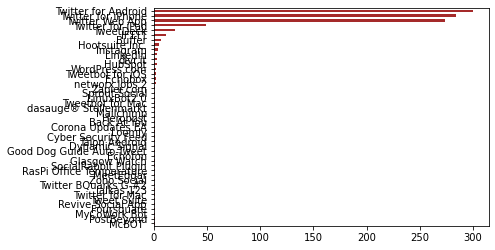

In [21]:
sources_sorted = sourceDF.sort_values('source', ascending=True) #Ordena em forma crescente pela coluna source
ax = sources_sorted.source.plot(kind="barh", color='#A52A2A')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

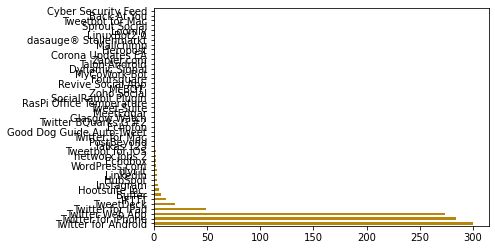

In [22]:
sources_sorted = sourceDF.sort_values('source',ascending=False) #Ordena em forma decrescente pela coluna source
ax = sources_sorted.source.plot(kind='barh',color='#B8860B')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

### Análise de polaridade:

In [23]:
# Variável que irá armazenar as polaridades
analysis = None

In [24]:
# Lista vazia para armazenar as polaridades
polarities = []

In [25]:
tweets_df.head(1)

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,"Amazing, amazing figure. The bill for PPE th...",208,1280874522359533569,ChrisGiles_,Chris Giles,,None,2020-07-08 14:40:58,TweetDeck,1623,876,None,None,None


In [26]:
for tweet in tweets_df['Tweets']:
    analysis = tb(tweet)
    
    polarity = analysis.sentiment.polarity # Analisa a polaridade
    
    polarities.append(polarity)

In [27]:
tweets_df.head(3)

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,"Amazing, amazing figure. The bill for PPE th...",208,1280874522359533569,ChrisGiles_,Chris Giles,,None,2020-07-08 14:40:58,TweetDeck,1623,876,None,None,None
1,How did the Government manage to spend £15bn o...,255,1280979912673955841,tnewtondunn,Tom Newton Dunn,London,None,2020-07-08 21:39:45,Twitter for iPad,572,278,None,None,None
2,"This is just racism, pure and simple. It's har...",206,1280787464362364928,misszing,Zing Tsjeng,"London, UK",None,2020-07-08 08:55:02,Twitter for Android,939,383,None,None,None


In [28]:
print("Vetor de polaridades: ", polarities)

Vetor de polaridades:  [0.475, 0.2672727272727273, -0.11547619047619048, 0.1, 0.2, -0.078125, 0.0, 0.0, 0.1787878787878788, 0.08055555555555555, 0.0, 0.33125, 0.032424242424242425, 0.0, 0.5, 0.0, 0.0, -0.04583333333333334, 0.8, 0.15333333333333332, 0.0, -0.04583333333333334, 0.0, -0.05357142857142857, -0.04583333333333334, -0.13055555555555554, -0.1, 0.18, -0.04583333333333334, 0.0, -0.06666666666666667, -0.04583333333333334, 0.0, -0.04583333333333334, 0.125, 0.0, -0.04583333333333334, 0.0, 0.15, 0.0, 0.18, 0.0, -0.1, 0.0, -0.04583333333333334, 0.18, 0.06666666666666667, -0.04583333333333334, 0.0, 0.0, 0.06666666666666665, 0.06666666666666667, -0.04583333333333334, -0.04583333333333334, 0.0, 0.18055555555555558, -0.04583333333333334, 0.18, 0.0, 0.18, -0.04583333333333334, 0.0, -0.08333333333333333, 0.0, -0.04583333333333334, 0.0, 0.18, -0.05, 0.0, 0.0, 0.25999999999999995, -0.15625, 0.0, 0.315625, 0.4, -0.04583333333333334, -0.42000000000000004, 0.0, -0.1, 0.0, -0.04583333333333334, -0

### Análise de Sentimentos:

In [29]:
print('Para a(s) palavra(s):"%s"' % keyword)
print('A MÉDIA DE SENTIMENTO É: ' + str(np.mean(polarities)))

Para a(s) palavra(s):"home office OR homeoffice"
A MÉDIA DE SENTIMENTO É: 0.052999374372444674


In [30]:
positive = 0
negative = 0
neutral = 0

for polarity in polarities:
    if polarity > 0:
        positive = positive+1
    elif polarity < 0:
        negative = negative+1
    else:
        neutral = neutral+1  

In [31]:
print("Tweets Positivos: %s" % positive)
print("Tweets Negativos: %s" % negative)
print("Tweets Neutros: %s" % neutral)

Tweets Positivos: 377
Tweets Negativos: 327
Tweets Neutros: 296


Calcula percentual

In [32]:
pos_pct=positive*100/len(polarities)
neg_pct=negative*100/len(polarities)
neu_pct=neutral*100/len(polarities)

In [33]:
sentiments = ['Positivos', 'Negativos','Neutros']
percents = [pos_pct, neg_pct, neu_pct]

analysis_percent_df = pd.DataFrame({'Percent': percents}, index = sentiments)
analysis_percent_df


,Percent
Positivos,37.7
Negativos,32.7
Neutros,29.6


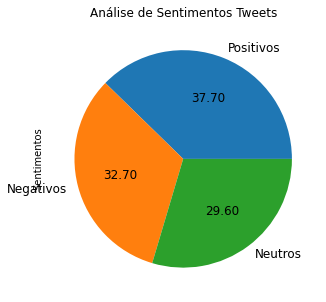

In [34]:
pie_chart = pd.Series(percents, index=sentiments, name="Sentimentos")
pie_chart.plot.pie(fontsize=12, autopct='%.2f', figsize=(5, 5), title="Análise de Sentimentos Tweets")

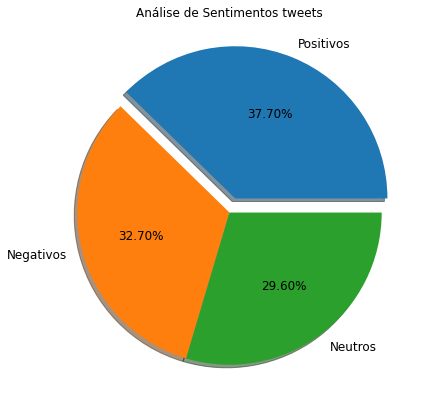

In [35]:
#ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',        shadow=True, startangle=90)
explode = (0.1, 0, 0) #Separa o primeiro

pie_chart = pd.Series(percents, index=sentiments,name='')
pie_chart.plot.pie(fontsize=12, explode=explode, autopct='%.2f%%', shadow=True, figsize=(7, 7),title="Análise de Sentimentos tweets");

### Mapa de calor dos tweets

In [ ]:
geolocator = Nominatim(user_agent = "TweeterSentiments")

latitude = []
longitude = []

for user_location in tweets_df['User Location']:
    try:
        location = geolocator.geocode(user_location)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        continue

In [ ]:
coordenadas = np.column_stack((latitude, longitude))

In [ ]:
mapa = folium.Map(zoom_start=3.)
mapa.add_child(plugins.HeatMap(coordenadas))
mapa.save('homeoffice.html')
mapa

### Nuvem de palavras

In [ ]:
words = ' '.join(tweets_df['Tweets'])

words_clean = " ".join([word for word in words.split()
                       if 'https' not in word
                           and not word.startswith('@')
                           and word != 'RT'
                       ])

**OBSERVAÇÃO:**
 Antes de importar o pacote imread faça a intalação do mesmo.

In [ ]:
import warnings

warnings.simplefilter('ignore')

wc = WordCloud(min_font_size = 10,
               max_font_size = 300,
               background_color = 'white',
               mode="RGB",
               width = 2000,
               height = 1000,
               normalize_plurals = True).generate(words_clean)

In [ ]:
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('homeoffice_cloud.png', dpi=300)
plt.show()

#####  Para texto em português, use o exemplo abaixo:

In [ ]:
stopwords = set(STOPWORDS)

new_words = []

with open("stopwords_pt.txt") as f:
    [new_words.append(word) for line in f 
                             for word in line.split()]

In [ ]:
new_stopwords = stopwords.union(new_words)

words = ' '.join(tweets_df['Tweets'])

words_clean = " ".join([word for word in words.split()
                            if 'https' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [ ]:
warnings.simplefilter('ignore')

wc = WordCloud()

wc = WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='white', 
               mode="RGB",
               stopwords=new_stopwords,
               width=2000, 
               height=1000,
               normalize_plurals= True).generate(words_clean)

In [ ]:
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('homeoffice_clound_pt.png', dpi=300)
plt.show()

### Análise temporal dos tweets

In [ ]:
# Tweets postados por dia
data = tweets_df

In [ ]:
print(data['Date'][0])

In [ ]:
from datetime import datetime

In [ ]:
data['Date'] = pd.to_datetime(data['Date']).apply(lambda x: x.date())

print(data['Date'][0])

In [ ]:
x = data['Date'].value_counts() #conta a quantiade de tweets por dia
x

In [ ]:
tlen = pd.Series(data['Date'].value_counts(), index=data['Date'])

tlen.plot(figsize=(16,4), color='r');

### Text Mining com o pacote NLTK

In [ ]:
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

tweets_tokens = [] #lista para armazenar os tokens

In [ ]:
for tweet in tweets_df['Tweets']:   
    print (tweet_tokenizer.tokenize(tweet))
    tweets_tokens.append(tweet_tokenizer.tokenize(tweet))

 #### Limpar tokens

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:

from nltk.corpus import stopwords 
import string
 
punctuation = list(string.punctuation)
stopwords_english = stopwords.words('english')

In [ ]:
def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
 
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
                word not in string.punctuation): # remove punctuation
            tweets_clean.append(word)
 
    return tweets_clean   

In [ ]:
clean_tweets_tokens = [] #lista para armazenar os tokens

In [ ]:

for tweet in tweets_df['Tweets']:   
    print (clean_tweets(tweet))
    clean_tweets_tokens.append(clean_tweets(tweet))